In [4]:
!pip install seaborn

     -------------------------------------- 288.2/288.2 kB 3.0 MB/s eta 0:00:00


In [5]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
# Used for calculating regressions
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [9]:
# Define path to files
path = r"C:\Users\koala\Documents\CASE22\STOCKS/"

# Start date defaults
S_YEAR = 2017
S_MONTH = 10
S_DAY = 13
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

# End date defaults
E_YEAR = 2022
E_MONTH = 11
E_DAY = 10
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

risk_free_rate = 0.0125 # Approximate 10 year bond rate

In [81]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

# On MacOS Only
# tickers.remove('.DS_Store')
tickers.sort()
len(tickers)

1730

In [82]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

In [83]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

In [84]:
# Here I added the top 30 for each sector. You can obviously add as many as 
# you like
# Then to keep the portfolio smaller I eliminated stocks that had an 
# allocation less than 1% to get this final list
# I showed in part 4 of this series how to get the top sector stocks
port_list = ['CLFD',  'PLUG',  'NSSC',  'TNDM',  'XENE',  'ARWR',  'ENPH',  'LSCC',  'AEHR',  'PERI',  'IRDM',  'TTGT',  'FRPT',  'COST',  'SMPL',  'TSLA',  'CROX',  'HEAR',  'MSEX',  'CWCO',  'ARTNA',  'ATLC',  'AMRK',  'LPLA',  'TGLS',  'HWKN',  'STLD',  'INTG',  'LAND',  'SBAC',  'AMTX',  'VTNR',  'REGI',  'LIME',  'TAPR',  'DTYS',  'EXPO',  'CSGP',  'CRAI',  'BRLI',  'ROSE',  'ADRA']
num_stocks = len(port_list)
num_stocks

42

In [186]:
mult_df = merge_df_by_column_name('Adj Close',  '2017-10-13', '2022-11-10', *port_list)
mult_df


,CLFD,PLUG,NSSC,TNDM,XENE,ARWR,ENPH,LSCC,AEHR,PERI,...,REGI,LIME,TAPR,DTYS,EXPO,CSGP,CRAI,BRLI,ROSE,ADRA
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-13,13.550000,2.80,5.075000,2.990000,3.125000,4.000000,1.390000,5.590000,3.670000,3.600000,...,11.5,1.72,22.6700,16.379999,36.167572,28.702000,40.512516,NaN,NaN,NaN
2017-10-16,13.750000,2.77,5.150000,2.560000,3.125000,3.890000,1.410000,5.570000,3.530000,3.690000,...,11.4,1.72,22.0704,16.680000,36.143513,28.622000,39.124584,NaN,NaN,NaN
2017-10-17,13.800000,2.67,5.200000,2.480000,3.200000,3.920000,1.370000,5.500000,3.460000,3.540000,...,11.2,1.70,22.2700,16.829901,35.902882,28.372000,40.081131,NaN,NaN,NaN
2017-10-18,13.600000,2.55,5.050000,2.550000,3.250000,3.900000,1.260000,5.730000,3.550000,3.600000,...,11.6,1.70,22.5100,17.132000,35.734432,28.375000,39.902946,NaN,NaN,NaN
2017-10-19,13.350000,2.53,5.125000,2.400000,3.200000,4.000000,1.290000,5.760000,3.570000,3.570000,...,11.7,1.52,22.1700,16.950001,34.675636,28.048000,39.527832,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,104.599998,14.79,24.690001,35.720001,35.700001,33.959999,282.440002,52.410000,19.480000,21.870001,...,NaN,NaN,NaN,NaN,97.650002,79.970001,115.949997,10.63,10.22,10.01
2022-11-07,90.650002,14.98,28.200001,38.369999,34.770000,34.310001,268.829987,53.230000,21.320000,22.190001,...,NaN,NaN,NaN,NaN,98.330002,80.349998,118.139999,10.63,10.22,10.03
2022-11-08,88.440002,14.81,26.889999,37.119999,35.400002,33.299999,280.070007,54.869999,21.660000,22.230000,...,NaN,NaN,NaN,NaN,98.940002,80.169998,117.489998,10.63,10.23,10.02


# убираем NaN

In [99]:

mult_df.mean()

CLFD      30.491259
PLUG      13.734089
NSSC      13.953808
TNDM      68.648624
XENE      15.586859
ARWR      38.324750
ENPH      89.199085
LSCC      30.567107
AEHR       4.948468
PERI      10.281587
IRDM      28.750461
TTGT      43.381071
FRPT      74.390966
COST     327.975178
SMPL      25.676920
TSLA     126.247225
CROX      52.929906
HEAR      15.994676
MSEX      66.797939
CWCO      12.836108
ARTNA     38.154976
ATLC      20.187694
AMRK      13.966787
LPLA     106.886309
TGLS      11.685587
HWKN      25.763593
STLD      44.206570
INTG      35.416521
LAND      16.573596
SBAC     254.254594
AMTX       5.004604
VTNR       3.115496
REGI      35.340106
LIME       1.923068
TAPR      39.162352
DTYS      34.689195
EXPO      73.451844
CSGP      62.098007
CRAI      59.514158
BRLI      10.164662
ROSE      10.037780
ADRA       9.828514
dtype: float64

In [100]:
mult_df.fillna(mult_df.mean())

,CLFD,PLUG,NSSC,TNDM,XENE,ARWR,ENPH,LSCC,AEHR,PERI,...,REGI,LIME,TAPR,DTYS,EXPO,CSGP,CRAI,BRLI,ROSE,ADRA
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-13,13.550000,2.80,5.075000,2.990000,3.125000,4.000000,1.390000,5.590000,3.670000,3.600000,...,11.500000,1.720000,22.670000,16.379999,36.167572,28.702000,40.512516,10.164662,10.03778,9.828514
2017-10-16,13.750000,2.77,5.150000,2.560000,3.125000,3.890000,1.410000,5.570000,3.530000,3.690000,...,11.400000,1.720000,22.070400,16.680000,36.143513,28.622000,39.124584,10.164662,10.03778,9.828514
2017-10-17,13.800000,2.67,5.200000,2.480000,3.200000,3.920000,1.370000,5.500000,3.460000,3.540000,...,11.200000,1.700000,22.270000,16.829901,35.902882,28.372000,40.081131,10.164662,10.03778,9.828514
2017-10-18,13.600000,2.55,5.050000,2.550000,3.250000,3.900000,1.260000,5.730000,3.550000,3.600000,...,11.600000,1.700000,22.510000,17.132000,35.734432,28.375000,39.902946,10.164662,10.03778,9.828514
2017-10-19,13.350000,2.53,5.125000,2.400000,3.200000,4.000000,1.290000,5.760000,3.570000,3.570000,...,11.700000,1.520000,22.170000,16.950001,34.675636,28.048000,39.527832,10.164662,10.03778,9.828514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,104.599998,14.79,24.690001,35.720001,35.700001,33.959999,282.440002,52.410000,19.480000,21.870001,...,35.340106,1.923068,39.162352,34.689195,97.650002,79.970001,115.949997,10.630000,10.22000,10.010000
2022-11-07,90.650002,14.98,28.200001,38.369999,34.770000,34.310001,268.829987,53.230000,21.320000,22.190001,...,35.340106,1.923068,39.162352,34.689195,98.330002,80.349998,118.139999,10.630000,10.22000,10.030000
2022-11-08,88.440002,14.81,26.889999,37.119999,35.400002,33.299999,280.070007,54.869999,21.660000,22.230000,...,35.340106,1.923068,39.162352,34.689195,98.940002,80.169998,117.489998,10.630000,10.23000,10.020000


# РИСУЕМ ГРАФИК С РОСТОМ КАЖДОГО АКТИВА

<AxesSubplot: xlabel='Date'>

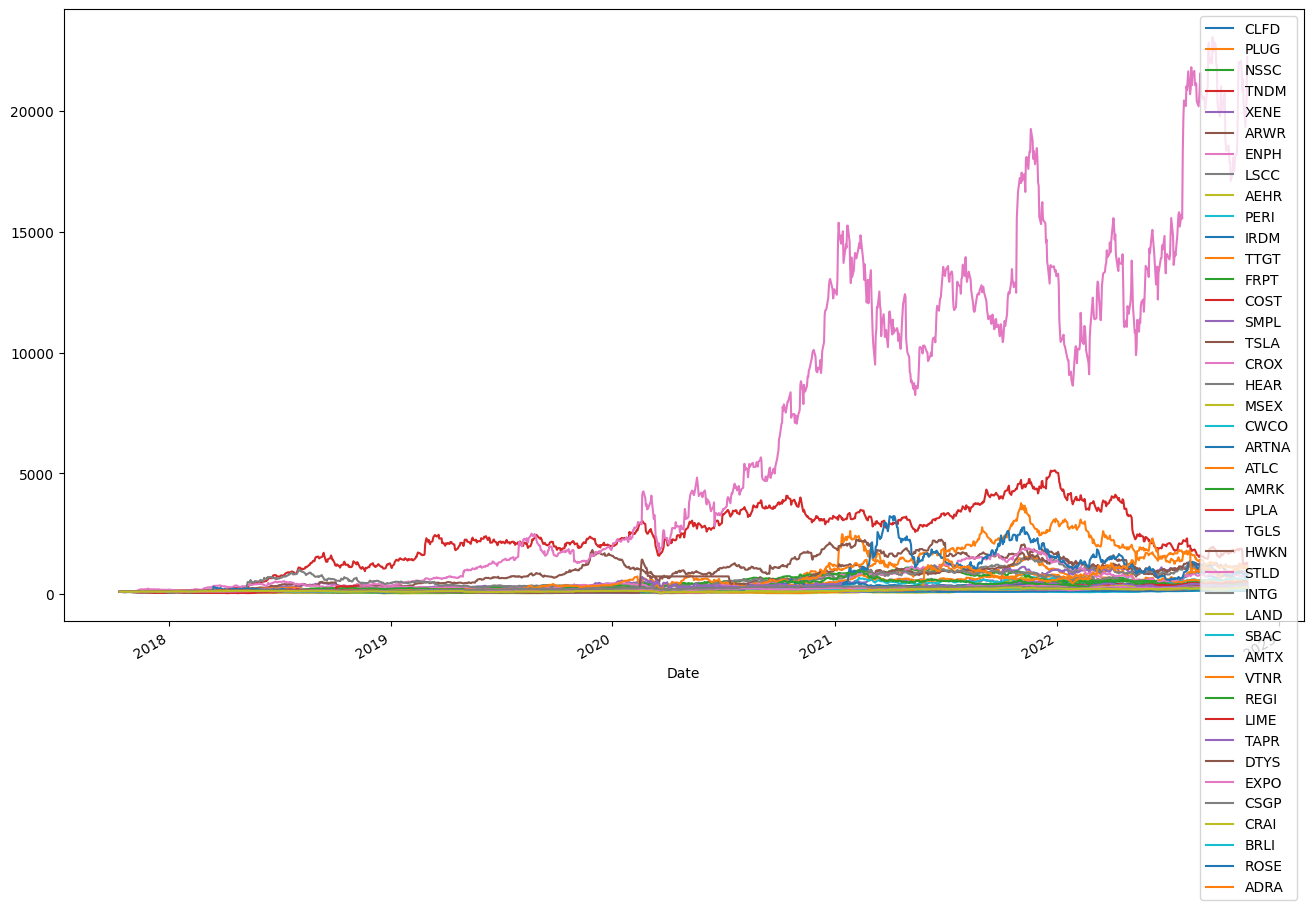

In [101]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16, 9))

# mean return

In [102]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

CLFD     0.369390
PLUG     0.355754
NSSC     0.336342
TNDM     0.504747
XENE     0.475247
ARWR     0.426174
ENPH     1.065744
LSCC     0.475215
AEHR     0.365795
PERI     0.379189
IRDM     0.304633
TTGT     0.261278
FRPT     0.272796
COST     0.242489
SMPL     0.229210
TSLA     0.411153
CROX     0.447852
HEAR     0.190063
MSEX     0.159028
CWCO     0.087404
ARTNA    0.064881
ATLC     0.484597
AMRK     0.304767
LPLA     0.311392
TGLS     0.276917
HWKN     0.164080
STLD     0.213190
INTG     0.140743
LAND     0.124228
SBAC     0.136063
AMTX     0.414840
VTNR     0.481149
REGI     0.360210
LIME     1.172622
TAPR     0.436490
DTYS     0.530063
EXPO     0.207015
CSGP     0.212120
CRAI     0.213624
BRLI     0.037416
ROSE     0.037619
ADRA     0.017276
dtype: float64

# СЧИТАЕМ КОВАРИАЦИЮ

In [148]:
cov = returns.cov() * 252
cov.mean
cov = cov.fillna(cov.mean())
cov

,CLFD,PLUG,NSSC,TNDM,XENE,ARWR,ENPH,LSCC,AEHR,PERI,...,REGI,LIME,TAPR,DTYS,EXPO,CSGP,CRAI,BRLI,ROSE,ADRA
CLFD,0.301455,0.140464,0.073083,0.071145,0.072255,0.110983,0.125795,0.122528,0.120838,0.097566,...,0.074725,-0.020206,0.059309,0.039070,0.057023,0.056882,0.069684,-0.000639,-0.000606,0.000538
PLUG,0.140464,0.626502,0.102549,0.138764,0.129913,0.182094,0.289502,0.154230,0.184043,0.194749,...,0.145880,-0.004198,0.159801,0.164407,0.070502,0.091313,0.080000,0.000228,-0.000868,0.001228
NSSC,0.073083,0.102549,0.246461,0.068490,0.047638,0.085391,0.093741,0.087315,0.072896,0.058522,...,0.058341,0.021818,0.062181,0.013904,0.039593,0.048679,0.048973,0.000478,-0.000563,0.001192
TNDM,0.071145,0.138764,0.068490,0.438410,0.093929,0.128626,0.119294,0.097817,0.085644,0.095904,...,0.053121,-0.073651,0.102917,0.094472,0.054764,0.083292,0.044776,0.000161,-0.001432,-0.000170
XENE,0.072255,0.129913,0.047638,0.093929,0.481130,0.151994,0.091943,0.077077,0.091119,0.108268,...,0.064116,0.070829,0.062504,0.032231,0.035279,0.054558,0.051547,0.001730,-0.000793,0.000977
ARWR,0.110983,0.182094,0.085391,0.128626,0.151994,0.507539,0.185897,0.130787,0.120566,0.131873,...,0.091697,-0.139253,0.052636,-0.003545,0.064777,0.087519,0.071269,-0.001385,-0.002248,0.000845
ENPH,0.125795,0.289502,0.093741,0.119294,0.091943,0.185897,0.653410,0.169952,0.135832,0.158614,...,0.114748,-0.042201,0.091292,-0.003347,0.064398,0.097622,0.074835,-0.002375,-0.002593,-0.000283
LSCC,0.122528,0.154230,0.087315,0.097817,0.077077,0.130787,0.169952,0.264268,0.124399,0.118095,...,0.076651,0.001471,0.055818,-0.016437,0.061238,0.079006,0.065849,-0.003180,-0.002419,0.000497
AEHR,0.120838,0.184043,0.072896,0.085644,0.091119,0.120566,0.135832,0.124399,0.792767,0.136488,...,0.076031,0.026953,0.119921,0.134787,0.050765,0.070198,0.065091,-0.000502,-0.002849,-0.001951
PERI,0.097566,0.194749,0.058522,0.095904,0.108268,0.131873,0.158614,0.118095,0.136488,0.404372,...,0.088390,0.046342,0.045301,0.004181,0.049897,0.061080,0.064375,-0.000910,-0.000811,0.001782


# КОРРЕЛЯЦИЯ

In [147]:
corr = returns.corr()
corr = corr.fillna(corr.mean())
corr

,CLFD,PLUG,NSSC,TNDM,XENE,ARWR,ENPH,LSCC,AEHR,PERI,...,REGI,LIME,TAPR,DTYS,EXPO,CSGP,CRAI,BRLI,ROSE,ADRA
CLFD,1.000000,0.323216,0.268120,0.195702,0.189725,0.283734,0.283439,0.434113,0.247185,0.279445,...,0.218789,-0.035034,0.072206,0.042300,0.358253,0.298622,0.286765,-0.018671,-0.021939,0.021156
PLUG,0.323216,1.000000,0.260973,0.264773,0.236624,0.322923,0.452478,0.379040,0.261147,0.386922,...,0.291718,-0.006037,0.125602,0.117165,0.307253,0.332531,0.228367,0.004727,-0.025742,0.038683
NSSC,0.268120,0.260973,1.000000,0.208359,0.138339,0.241437,0.233593,0.342129,0.164913,0.185376,...,0.184499,0.038056,0.067698,0.012537,0.275101,0.282635,0.222889,0.021449,-0.033665,0.074925
TNDM,0.195702,0.264773,0.208359,1.000000,0.204517,0.272679,0.222887,0.287376,0.145272,0.227774,...,0.129880,-0.059682,0.084969,0.063464,0.285301,0.362596,0.152793,0.005536,-0.053074,-0.007538
XENE,0.189725,0.236624,0.138339,0.204517,1.000000,0.307581,0.163982,0.216159,0.147539,0.245459,...,0.142349,0.073502,0.056611,0.024714,0.175445,0.226719,0.167910,0.043573,-0.033951,0.032051
ARWR,0.283734,0.322923,0.241437,0.272679,0.307581,1.000000,0.322809,0.357113,0.190072,0.291092,...,0.200478,-0.122741,0.040902,-0.002359,0.313646,0.354103,0.226030,-0.038955,-0.086069,0.033944
ENPH,0.283439,0.452478,0.233593,0.222887,0.163982,0.322809,1.000000,0.408988,0.188729,0.308572,...,0.219670,-0.034714,0.061766,-0.001886,0.274812,0.348109,0.209177,-0.062962,-0.092270,-0.010747
LSCC,0.434113,0.379040,0.342129,0.287376,0.216159,0.357113,0.408988,1.000000,0.271782,0.361259,...,0.236307,0.002710,0.066129,-0.016287,0.410911,0.442995,0.289421,-0.113209,-0.102668,0.023854
AEHR,0.247185,0.261147,0.164913,0.145272,0.147539,0.190072,0.188729,0.271782,1.000000,0.241063,...,0.136538,0.035502,0.099893,0.100257,0.196674,0.227255,0.165178,-0.008610,-0.073648,-0.043234
PERI,0.279445,0.386922,0.185376,0.227774,0.245459,0.291092,0.308572,0.361259,0.241063,1.000000,...,0.215004,0.060248,0.042689,0.003466,0.270670,0.276867,0.228734,-0.025296,-0.036841,0.076943


# СОЗДАЕМ РАНДОМНЫЙ ПОРТФЕЛЬ ЧТОБЫ ВЕСА БЫЛИ 1 И ИЩЕМ НАИБОЛЕЕ ЭФФЕКТИВНЫЙ

In [171]:
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.02631151 0.04441832 0.0449698  0.02914305 0.02805671 0.0099897
 0.04192348 0.01125421 0.01606956 0.03001278 0.01666632 0.03516949
 0.0076862  0.02423335 0.00788223 0.02760297 0.01155856 0.04374174
 0.01429317 0.00930909 0.02579223 0.03907834 0.00236894 0.00415138
 0.03374717 0.025116   0.00468788 0.00351314 0.00169212 0.03143584
 0.00876277 0.00727794 0.03130316 0.01767629 0.02947079 0.02731522
 0.04949837 0.04854054 0.01307034 0.02448681 0.04303747 0.04768501]
Total Weight : 0.9999999999999999


# ДОХОДНОСТЬ ПОРТФЕЛЯ СЛУЧАЙНОГО

In [163]:
# Provide return of portfolio using random weights over the whole dataset

np.sum(weights * mean_ret)

0.35012146140920297

# СЧИТАЕМ ВОЛАТИЛЬНОСТЬ

In [172]:
np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

0.2729722551307269

# СОЗДАЕМ 10000 ВАРИАНТОВ

In [175]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(num_stocks)
    p_weights /= np.sum(p_weights)
    
    # Add return using those weights to list
    ret_1 = np.sum(p_weights * mean_ret)
    p_ret.append(ret_1)
    
    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(cov, p_weights)))
    p_vol.append(vol_1)
    
    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)
    
    # Store the weights for each portfolio
    p_wt.append(p_weights)
    
# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.31373419, 0.36276014, 0.36363498, ..., 0.36406885, 0.32977418,
        0.34707501]),
 array([0.2851456 , 0.28347492, 0.28500379, ..., 0.29411143, 0.2685535 ,
        0.26507135]),
 array([1.05642234, 1.23559481, 1.2320362 , ..., 1.19535932, 1.18141889,
        1.26220737]),
 array([[0.02117634, 0.00253518, 0.02816071, ..., 0.02773216, 0.03566284,
         0.01174498],
        [0.03583756, 0.0399637 , 0.03994921, ..., 0.03335756, 0.03381977,
         0.03018654],
        [0.0326802 , 0.00617732, 0.0351685 , ..., 0.01199652, 0.00741994,
         0.00770925],
        ...,
        [0.03005974, 0.00909918, 0.00097338, ..., 0.01624047, 0.02074279,
         0.01417577],
        [0.04230313, 0.02150186, 0.0256445 , ..., 0.02345305, 0.02601263,
         0.01468498],
        [0.02146242, 0.01975714, 0.03514456, ..., 0.02907803, 0.02540944,
         0.00649147]]))

# строим на графике

<AxesSubplot: xlabel='Volatility', ylabel='Return'>

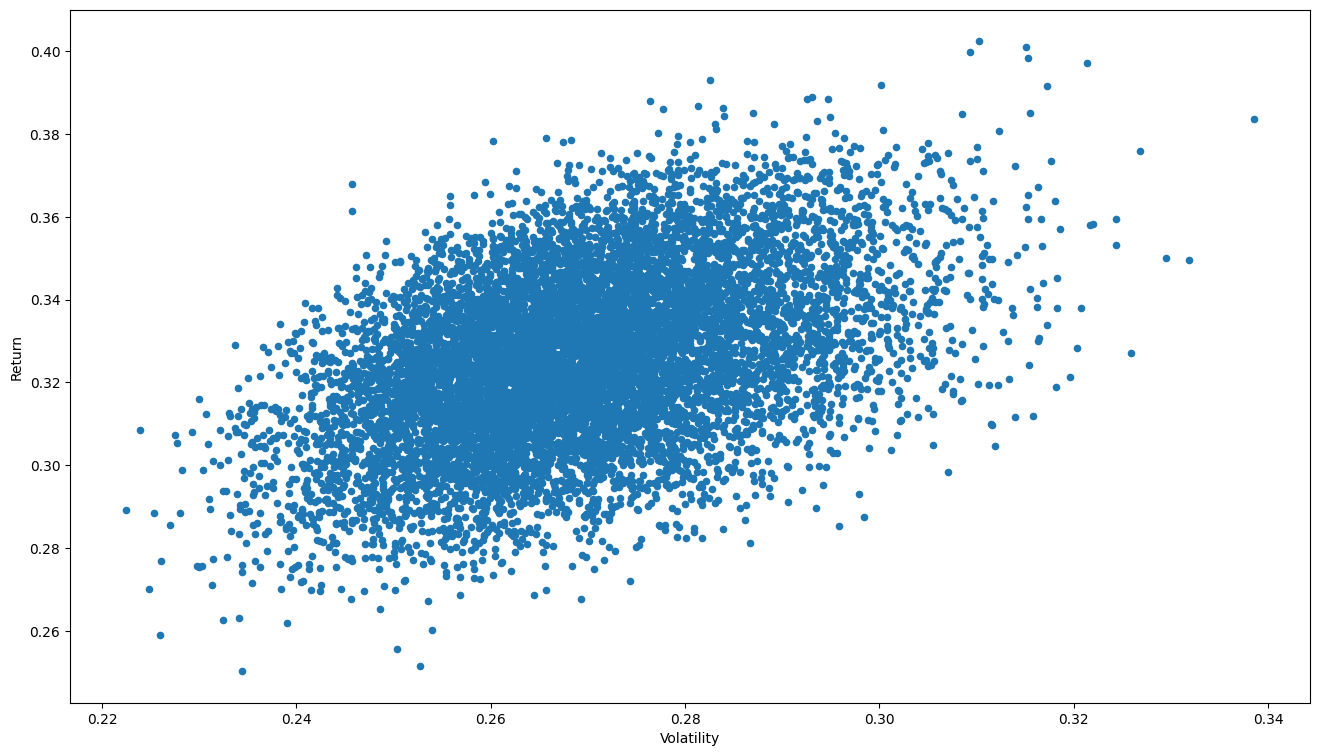

In [176]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

# КОЭФФИЦИЕНТ ШАРПА
ЦЕЛЬ -- МИНИМЗИРОВАТЬ

In [187]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < num_stocks:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[SR_idx][i] * 100)))
    i += 1
    
# Find volatility of that portfolio
print("\nVolatility :", p_vol[SR_idx])
      
# Find return of that portfolio
print("Return :", p_ret[SR_idx])
print("Sharpe :", SR_idx)

Stock : CLFD : 4.06
Stock : PLUG : 1.01
Stock : NSSC : 4.13
Stock : TNDM : 5.42
Stock : XENE : 2.57
Stock : ARWR : 3.59
Stock : ENPH : 3.63
Stock : LSCC : 3.93
Stock : AEHR : 0.07
Stock : PERI : 2.83
Stock : IRDM : 0.69
Stock : TTGT : 1.18
Stock : FRPT : 0.16
Stock : COST : 3.98
Stock : SMPL : 0.26
Stock : TSLA : 0.40
Stock : CROX : 5.36
Stock : HEAR : 0.79
Stock : MSEX : 3.68
Stock : CWCO : 1.07
Stock : ARTNA : 4.79
Stock : ATLC : 4.18
Stock : AMRK : 5.64
Stock : LPLA : 2.38
Stock : TGLS : 0.74
Stock : HWKN : 2.01
Stock : STLD : 0.24
Stock : INTG : 0.31
Stock : LAND : 0.02
Stock : SBAC : 2.56
Stock : AMTX : 1.59
Stock : VTNR : 0.64
Stock : REGI : 0.82
Stock : LIME : 4.86
Stock : TAPR : 0.02
Stock : DTYS : 2.61
Stock : EXPO : 2.75
Stock : CSGP : 2.77
Stock : CRAI : 2.91
Stock : BRLI : 3.06
Stock : ROSE : 5.40
Stock : ADRA : 0.91

Volatility : 0.2457024966974386
Return : 0.3678431575007572
Sharpe : 9440


In [184]:
def get_port_shares(one_price, force_one, wts, prices):
    # Gets number of stocks to analyze
    num_stocks = len(wts)
    
    # Holds the number of shares for each
    shares = []
    
    # Holds Cost of shares for each
    cost_shares = []
    
    i = 0
    while i < num_stocks:
        # Get max amount to spend on stock 
        max_price = one_price * wts[i]
        
        # Gets number of shares to buy and adds them to list
        num_shares = int(max_price / prices[i])
        
        # If the user wants to force buying one share do it
        if(force_one & (num_shares == 0)):
            num_shares = 1
        
        shares.append(num_shares)
        
        # Gets cost of those shares and appends to list
        cost = num_shares * prices[i]
        cost_shares.append(cost)
        i += 1
        
    return shares, cost_shares

In [185]:
def get_port_weighting(share_cost):
    
    # Holds weights for stocks
    stock_wts = []
    # All values summed
    tot_val = sum(share_cost)
    print("Total Investment :", tot_val)
    
    for x in share_cost:
        stock_wts.append(x / tot_val)
    return stock_wts

# Daily return

In [180]:
def get_port_daily_return(sdate, edate, shares, tickers):
    # Merge all daily prices for all stocks into 1 dataframe
    mult_df = merge_df_by_column_name('Adj Close',  sdate, 
                                  edate, *port_list)
    
    # Get the number of stocks in portfolio
    num_cols = len(mult_df.columns)
    
    # Multiply each stock column by the number of shares
    i = 0
    while i < num_cols:
        mult_df[tickers[i]] = mult_df[tickers[i]].apply(lambda x: x * shares[i])
        i += 1
        
    # Create a new column with the sums of all stocks named Total
    mult_df['Total'] = mult_df.iloc[:, 0:num_cols].sum(axis=1)
    
    # Add column for portfolio daily return
    mult_df['daily_return'] = (mult_df['Total'] / mult_df['Total'].shift(1)) - 1
    
    return mult_df

In [183]:
tot_port_df = get_port_daily_return('2017-11-13', '2022-11-10', 
                                    port_shares, port_list)
tot_port_df


NameError: name 'port_shares' is not defined

In [181]:
def find_port_beta(port_df, sdate, edate):
    # Will hold data for S&P and my portfolio
    mult_df = pd.DataFrame()
    
    # Mask defining the dates worth of data that we want
    port_mask = (port_df.index >= sdate) & (port_df.index <= edate)
    
    # Get S&P Dataframe
    sp_df = get_df_from_csv('^GSPC')
    
    sp_mask = (sp_df.index >= sdate) & (sp_df.index <= edate)
    
    # Add S&P daily return to dataframe
    mult_df['^GSPC'] = sp_df.loc[sp_mask]['daily_return']
    
    # Add the portfolio daily return data
    mult_df['Portfolio'] = port_df.loc[port_mask]['daily_return']
    
    # Provides the covariance between the securities
    cov = mult_df.cov() * 252
    
    # Get the covariance of the stocks and the market
    cov_vs_market = cov.iloc[0,1]
    
    # Get annualized variance of the S&P
    sp_var = mult_df['^GSPC'].var() * 252
    
    # Beta is normally calculated over a 5 year period which is why you may see a difference
    beta = cov_vs_market / sp_var
    return beta

In [182]:
port_beta = find_port_beta(tot_port_df, '2020-01-02', '2020-12-31')
port_beta

NameError: name 'tot_port_df' is not defined